# Convolutional Neuronal Network (CNN)

In [6]:
import numpy as np
import pandas as pd

from clases.DenseLayer import DenseLayer
from clases.ConvLayer import ConvLayer
from clases.FlattenLayer import FlattenLayer
from clases.ActivationFunction import ReLU, Softmax
from clases.LossFunction import cross_entropy_loss, cross_entropy_loss_grad
from clases.Trainer import Trainer
from clases.Optimizer import GDOptimizer, AdamOptimizer
from clases.NeuronalNetwork import NeuronalNetwork

from clases.Test import *

### 1. Load data and reshape into pictures

In [7]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

In [8]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

#Reshape
X_train = X_train.reshape(len(X_train), 1, 28, 28)
X_test = X_test.reshape(len(X_test), 1, 28, 28)
X_val = X_val.reshape(len(X_val), 1, 28, 28)


### Learning rate 0.001 batch size 32

In [9]:
layers = [
    ConvLayer((1,28,28),3,5),
    FlattenLayer((5,26,26), (1,5*26*26)),
    DenseLayer(5 * 26 * 26, 100, ReLU),
    DenseLayer(100, 10, Softmax)
]

In [10]:
nn = NeuronalNetwork(None, [])
nn.layers = layers
optimizer = GDOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 32)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=20, print_every=1)

| Epoch   1 | time: 16.38s | val loss 0.058 | val metric 0.900 |
| Epoch   2 | time: 19.04s | val loss 0.050 | val metric 0.915 |
| Epoch   3 | time: 18.37s | val loss 0.044 | val metric 0.926 |
| Epoch   4 | time: 18.90s | val loss 0.042 | val metric 0.929 |
| Epoch   5 | time: 17.59s | val loss 0.039 | val metric 0.934 |
| Epoch   6 | time: 17.27s | val loss 0.037 | val metric 0.935 |
| Epoch   7 | time: 15.16s | val loss 0.034 | val metric 0.942 |
| Epoch   8 | time: 17.58s | val loss 0.033 | val metric 0.943 |
| Epoch   9 | time: 18.15s | val loss 0.032 | val metric 0.947 |
| Epoch  10 | time: 15.21s | val loss 0.031 | val metric 0.947 |
| Epoch  11 | time: 15.49s | val loss 0.031 | val metric 0.947 |
| Epoch  12 | time: 15.21s | val loss 0.029 | val metric 0.952 |
| Epoch  13 | time: 15.85s | val loss 0.029 | val metric 0.951 |
| Epoch  14 | time: 15.12s | val loss 0.027 | val metric 0.952 |
| Epoch  15 | time: 15.01s | val loss 0.026 | val metric 0.954 |
| Epoch  16 | time: 15.16

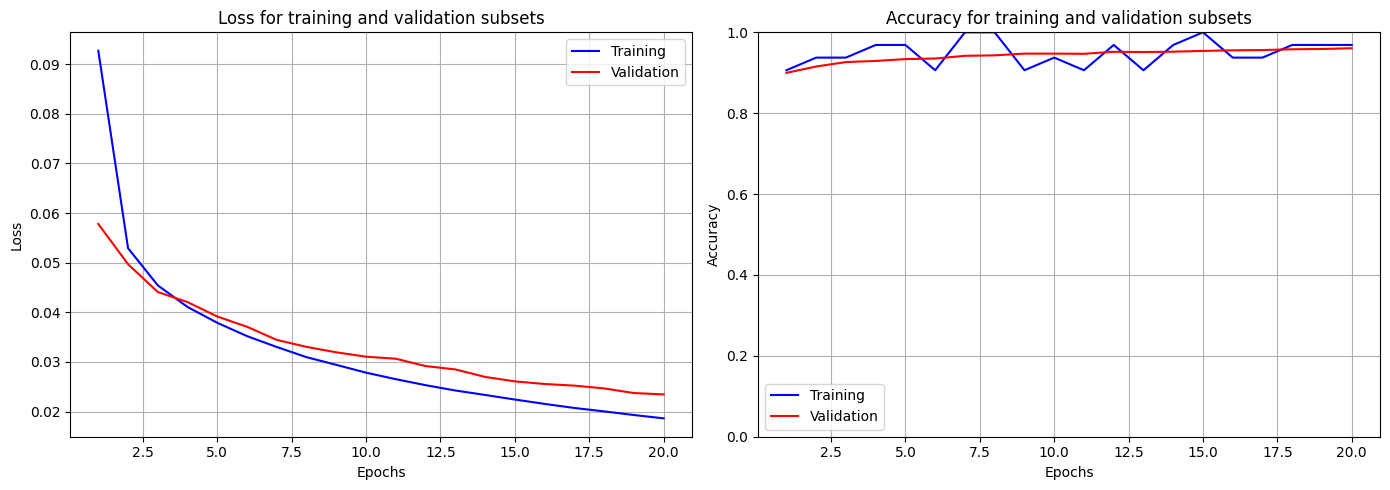

In [11]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

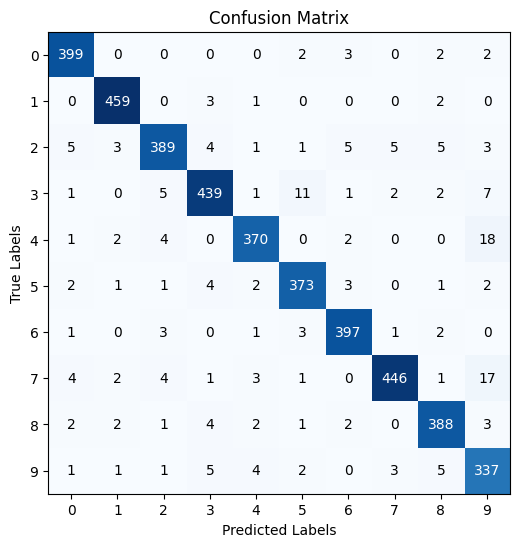

Accuracy: 0.9516666666666667
              precision    recall  f1_score  support
class                                               
0              0.959135  0.977941  0.968447      408
1              0.976596  0.987097  0.981818      465
2              0.953431  0.923990  0.938480      421
3              0.954348  0.936034  0.945102      469
4              0.961039  0.931990  0.946292      397
5              0.946701  0.958869  0.952746      389
6              0.961259  0.973039  0.967113      408
7              0.975930  0.931106  0.952991      479
8              0.950980  0.958025  0.954490      405
9              0.866324  0.938719  0.901070      359
weighted_avg   0.952392  0.951667  0.951771     4200


In [12]:
Y_pred = nn.forward(X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

###

In [13]:
layers = [
    ConvLayer((1,28,28),3,5),
    FlattenLayer((5,26,26), (1,5*26*26)),
    DenseLayer(5 * 26 * 26, 100, ReLU),
    DenseLayer(100, 10, Softmax)
]

In [14]:
nn = NeuronalNetwork(None, [])
nn.layers = layers
optimizer = GDOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 64)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=20, print_every=1)

| Epoch   1 | time: 15.89s | val loss 0.075 | val metric 0.870 |
| Epoch   2 | time: 15.26s | val loss 0.063 | val metric 0.888 |
| Epoch   3 | time: 15.05s | val loss 0.056 | val metric 0.906 |
| Epoch   4 | time: 16.34s | val loss 0.052 | val metric 0.911 |
| Epoch   5 | time: 14.32s | val loss 0.049 | val metric 0.917 |
| Epoch   6 | time: 14.32s | val loss 0.049 | val metric 0.915 |
| Epoch   7 | time: 16.37s | val loss 0.046 | val metric 0.921 |
| Epoch   8 | time: 14.67s | val loss 0.044 | val metric 0.924 |
| Epoch   9 | time: 15.52s | val loss 0.042 | val metric 0.929 |
| Epoch  10 | time: 14.89s | val loss 0.042 | val metric 0.929 |
| Epoch  11 | time: 17.25s | val loss 0.040 | val metric 0.932 |
| Epoch  12 | time: 17.04s | val loss 0.039 | val metric 0.935 |
| Epoch  13 | time: 16.78s | val loss 0.039 | val metric 0.935 |
| Epoch  14 | time: 17.93s | val loss 0.038 | val metric 0.935 |
| Epoch  15 | time: 16.11s | val loss 0.037 | val metric 0.938 |
| Epoch  16 | time: 15.16

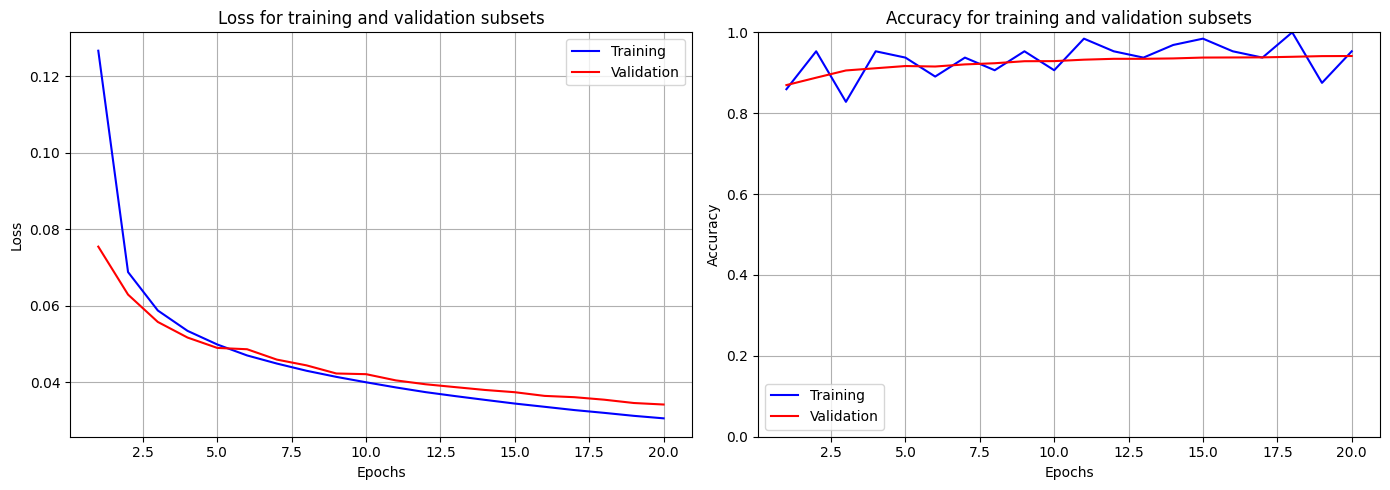

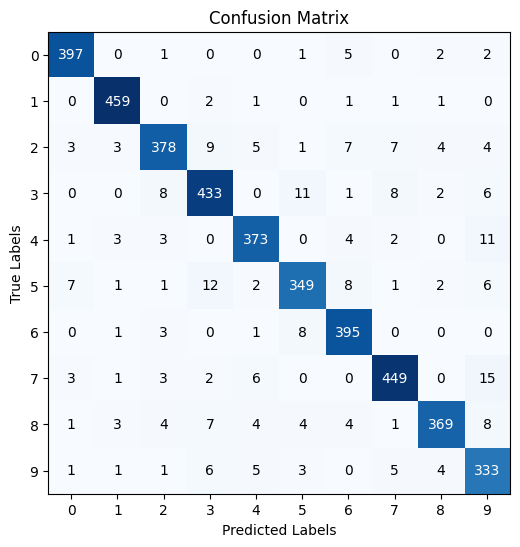

Accuracy: 0.9369047619047619
              precision    recall  f1_score  support
class                                               
0              0.961259  0.973039  0.967113      408
1              0.972458  0.987097  0.979723      465
2              0.940299  0.897862  0.918591      421
3              0.919321  0.923241  0.921277      469
4              0.939547  0.939547  0.939547      397
5              0.925729  0.897172  0.911227      389
6              0.929412  0.968137  0.948379      408
7              0.947257  0.937370  0.942288      479
8              0.960938  0.911111  0.935361      405
9              0.864935  0.927577  0.895161      359
weighted_avg   0.937417  0.936905  0.936882     4200


In [15]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = nn.forward(X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

In [ ]:
layers = [
    ConvLayer((1,28,28),3,5),
    FlattenLayer((5,26,26), (1,5*26*26)),
    DenseLayer(5 * 26 * 26, 100, ReLU),
    DenseLayer(100, 10, Softmax)
]

nn = NeuronalNetwork(None, [])
nn.layers = layers
optimizer = GDOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 64)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=20, print_every=1)

| Epoch   1 | time: 17.58s | val loss 0.056 | val metric 0.900 |
| Epoch   2 | time: 17.80s | val loss 0.043 | val metric 0.927 |
| Epoch   3 | time: 14.16s | val loss 0.040 | val metric 0.931 |
| Epoch   4 | time: 15.18s | val loss 0.036 | val metric 0.940 |
| Epoch   5 | time: 15.67s | val loss 0.032 | val metric 0.945 |
| Epoch   6 | time: 15.79s | val loss 0.031 | val metric 0.948 |
| Epoch   7 | time: 16.15s | val loss 0.029 | val metric 0.950 |
| Epoch   8 | time: 15.65s | val loss 0.028 | val metric 0.952 |
| Epoch   9 | time: 15.96s | val loss 0.028 | val metric 0.952 |
| Epoch  10 | time: 14.91s | val loss 0.027 | val metric 0.954 |
| Epoch  11 | time: 15.32s | val loss 0.027 | val metric 0.951 |
| Epoch  12 | time: 15.58s | val loss 0.025 | val metric 0.956 |
| Epoch  13 | time: 15.09s | val loss 0.026 | val metric 0.955 |
| Epoch  14 | time: 15.99s | val loss 0.023 | val metric 0.962 |
| Epoch  15 | time: 14.88s | val loss 0.024 | val metric 0.960 |
| Epoch  16 | time: 15.78

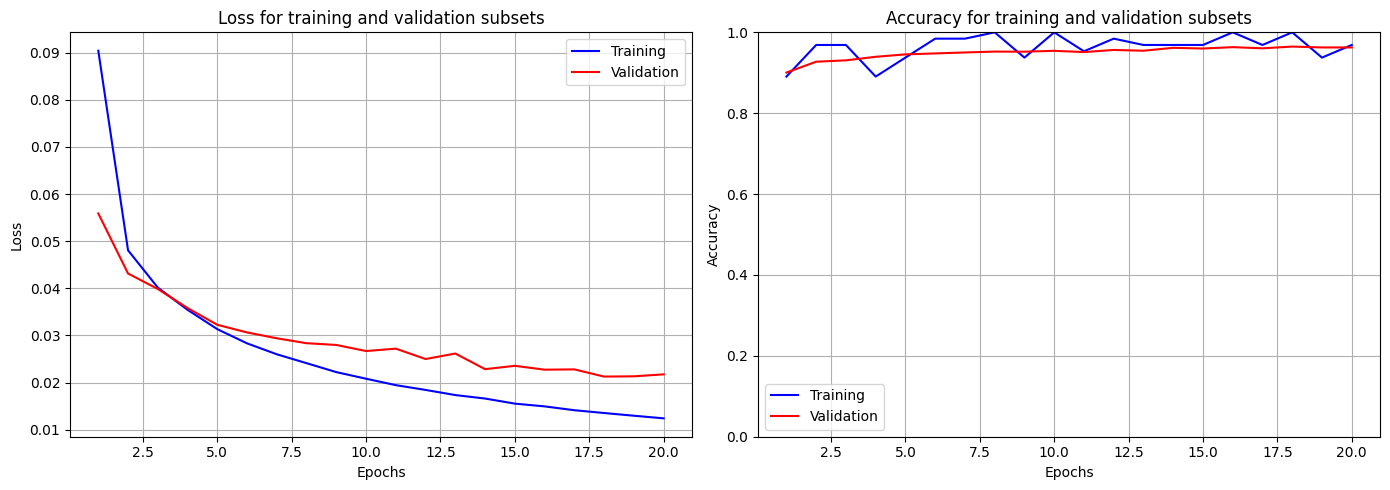

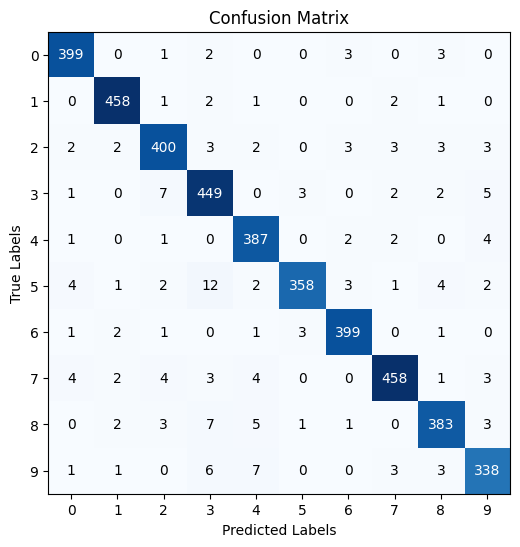

Accuracy: 0.9592857142857143
              precision    recall  f1_score  support
class                                               
0              0.966102  0.977941  0.971985      408
1              0.978632  0.984946  0.981779      465
2              0.952381  0.950119  0.951249      421
3              0.927686  0.957356  0.942288      469
4              0.946210  0.974811  0.960298      397
5              0.980822  0.920308  0.949602      389
6              0.970803  0.977941  0.974359      408
7              0.972399  0.956159  0.964211      479
8              0.955112  0.945679  0.950372      405
9              0.944134  0.941504  0.942817      359
weighted_avg   0.959545  0.959286  0.959264     4200


In [17]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = nn.forward(X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)